In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='tAvWUB4eclRbRZAFozjh62sYSEIdhy6NIKFd3DKe1KV2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizersrecommendationsystemfo-donotdelete-pr-mkibdvxx4g0edc'
object_key = 'Fertilizers_Recommendation_System_For_Disease_Prediction.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1)

In [3]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)


In [4]:
pwd

'/home/wsuser/work'

In [21]:
import os
filenames=os.listdir("/home/wsuser/work/Fertilizers_Recommendation_System_For_Disease_Prediction/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/train")


In [22]:
x_train=train_datagen.flow_from_directory('/home/wsuser/work/Fertilizers_Recommendation_System_For_Disease_Prediction/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/train',target_size=(128,128),batch_size=2,class_mode='categorical')
x_test=test_datagen.flow_from_directory('/home/wsuser/work/Fertilizers_Recommendation_System_For_Disease_Prediction/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/test',target_size=(128,128),batch_size=2,class_mode="categorical")

Found 5384 images belonging to 6 classes.
Found 1686 images belonging to 6 classes.


In [23]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten


In [25]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=40,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=20,kernel_initializer='random_uniform',activation='relu'))
model.add(Dense(units=6,kernel_initializer='random_uniform',activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [26]:
model.fit(x_train,steps_per_epoch=89,epochs=20,validation_data=x_test,validation_steps=27)

Epoch 1/20
89/89 [==============================] - 8s 83ms/step - loss: 1.7574 - accuracy: 0.2921 - val_loss: 41.1837 - val_accuracy: 0.2222
Epoch 2/20
89/89 [==============================] - 7s 82ms/step - loss: 1.5950 - accuracy: 0.4607 - val_loss: 110.3885 - val_accuracy: 0.4815
Epoch 3/20
89/89 [==============================] - 7s 81ms/step - loss: 1.2462 - accuracy: 0.5843 - val_loss: 181.1124 - val_accuracy: 0.5556
Epoch 4/20
89/89 [==============================] - 7s 81ms/step - loss: 0.9958 - accuracy: 0.6742 - val_loss: 160.4982 - val_accuracy: 0.5000
Epoch 5/20
89/89 [==============================] - 7s 83ms/step - loss: 0.9792 - accuracy: 0.6404 - val_loss: 98.7401 - val_accuracy: 0.7037
Epoch 6/20
89/89 [==============================] - 8s 84ms/step - loss: 0.7822 - accuracy: 0.7022 - val_loss: 101.9314 - val_accuracy: 0.7037
Epoch 7/20
89/89 [==============================] - 8s 87ms/step - loss: 0.8276 - accuracy: 0.6629 - val_loss: 63.9153 - val_accuracy: 0.7037
Ep

In [27]:
model.save('fruit.h5')


In [28]:
!tar -zcvf fruit_disease_classification_model_new.tgz fruit.h5

fruit.h5


In [29]:
ls -1

Fertilizers_Recommendation_System_For_Disease_Prediction/
fruit_disease_classification_model_new.tgz
fruit.h5


In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 40)                5080360   
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 6)                 126       
                                                        

In [31]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 13.0 MB/s eta 0:00:01


In [2]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                   "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"dTl6oleSifcoSDxQyHGMUgZfsHppoP68EgnOanTVItW_"
                  }

client = APIClient(wml_credentials)

In [3]:
client=APIClient(wml_credentials)
print(client)

In [16]:
space_uid="f1ee56c4-52ae-4545-bab9-8abf3ac27e0a"

In [9]:
client.set.default_space(space_uid)

'SUCCESS'

In [10]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [11]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [12]:
model_details = client.repository.store_model(model= 'fruit_disease_classification_model_new.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
    )
model_id = client.repository.get_model_id(model_details)
model_id


'2043b019-c999-41ac-9596-08269d5f38b7'

In [13]:
ls

Fertilizers_Recommendation_System_For_Disease_Prediction/  fruit.h5
fruit_disease_classification_model_new.tgz


In [14]:
client.repository.download(model_id,"fruit_model.tar.gz")

Successfully saved model content to file: 'fruit_model.tar.gz'


'/home/wsuser/work/fruit_model.tar.gz'

In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('fruit.h5')

In [19]:
from keras_preprocessing.image import load_img,img_to_array
img=load_img("/home/wsuser/work/Fertilizers_Recommendation_System_For_Disease_Prediction/Dataset_Plant_Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/00a55069-3fa3-405b-8d87-4d3408a6ed98___RS_NLB 3645.JPG",target_size=(128,128))

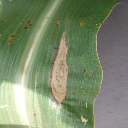

In [20]:
img

In [21]:
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___Bacterial_spot', 'Peach___healthy']
index[y[0]]

'Corn_(maize)___Northern_Leaf_Blight'